In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [4]:
# 读取数据
songs = pd.read_csv('MillionSongsFinal.csv')
songs.head()

,track_id,artist_name,title,genre,mode,duration,artist_hotttnesss,key,loudness,tempo,time_signature,artist_familiarity
0,TRACCEJ128F93257ED,Daniel Johnston,Story Of An Artist (Don't Be Scared),dance and electronica,1,311.53587,0.473613,0,-12.743,106.742,4,0.713322
1,TRACJWY12903CB7DBF,Kris Kristofferson,Same Old Song,folk,1,194.37669,0.496224,2,-11.663,74.809,4,0.732394
2,TRACMCG128F92CE225,Trivium,Upon The Shores [Explicit],metal,0,321.17506,0.494207,4,-3.973,100.604,4,0.847755
3,TRACRBQ128F4263964,J.J. Cale,Midnight In Memphis,classic pop and rock,1,263.94077,0.435469,0,-14.293,111.492,1,0.675771
4,TRACNJR128F4262E27,John Hammond,Come To Find Out,folk,0,247.32689,0.452818,6,-8.405,90.666,4,0.590693


In [5]:
# column names
songs.columns.values

array(['track_id', 'artist_name', 'title', 'genre', 'mode', 'duration',
       'artist_hotttnesss', 'key', 'loudness', 'tempo', 'time_signature',
       'artist_familiarity'], dtype=object)

In [11]:
# 查看 columns 的数值是否完整，以及 dtype 
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
track_id              546 non-null object
artist_name           546 non-null object
title                 546 non-null object
genre                 546 non-null object
mode                  546 non-null int64
duration              546 non-null float64
artist_hotttnesss     546 non-null float64
key                   546 non-null int64
loudness              546 non-null float64
tempo                 546 non-null float64
time_signature        546 non-null int64
artist_familiarity    546 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 51.3+ KB


In [7]:
# 数字 value 的 columns 分布如何
songs.describe()

,mode,duration,artist_hotttnesss,key,loudness,tempo,time_signature,artist_familiarity
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.684982,238.194227,0.433132,5.285714,-11.228908,124.928734,3.384615,0.641679
std,0.464949,100.840784,0.068990,3.672718,5.144480,36.750789,1.304355,0.100449
min,0.000000,1.227300,0.183182,0.000000,-32.339000,0.000000,1.000000,0.104187
25%,0.000000,177.612605,0.381244,2.000000,-13.574750,98.038500,3.000000,0.581746
50%,1.000000,224.286890,0.419408,5.000000,-10.258500,121.791500,4.000000,0.627361
75%,1.000000,279.320365,0.478780,9.000000,-7.543000,148.627500,4.000000,0.713845
max,1.000000,974.993830,0.633410,11.000000,-1.997000,244.366000,7.000000,0.919517


In [12]:
# 各个 genre 有多少
songs['genre'].value_counts()

classic pop and rock     226
folk                     122
soul and reggae           57
jazz and blues            42
metal                     32
dance and electronica     30
pop                       13
punk                       9
classical                  8
hip-hop                    7
Name: genre, dtype: int64

### boxplot: genre & duration

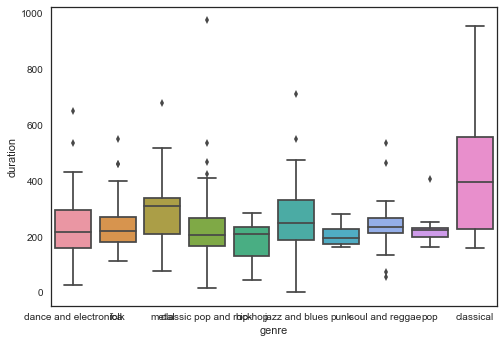

In [25]:
# 1st plot - sns boxplot - genere & duration - label overlapping
sns.boxplot(data=songs, x='genre', y='duration')

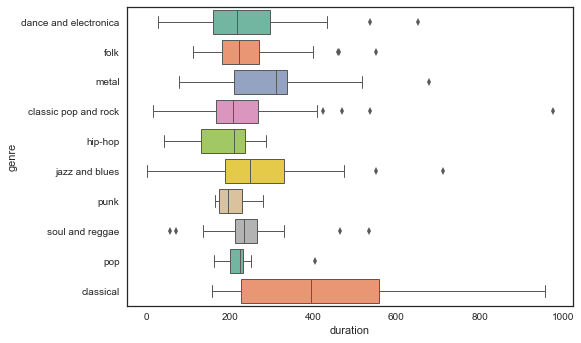

In [51]:
# 1st plot revision - 注意：如果改变方向，x和y也要跟着变！！！
# linewidth 控制 box 周边线的宽度，我觉得1正好，平常大概是2.5
# 整体大小还是无法改变
sns.boxplot(data=songs, orient='h', x='duration', y='genre', palette='Set2', linewidth=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001744FEB4320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001745127A2E8>]], dtype=object)

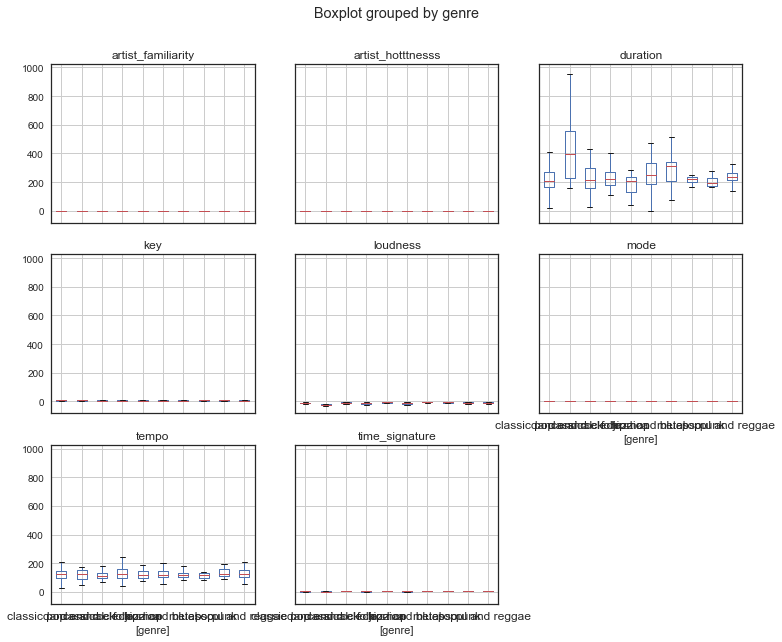

In [17]:
# 2nd plot - pandas boxplot - 换 pandas 内置 boxplot 试试，这个由于提取所有所以更不明显
songs.boxplot(by='genre', figsize=(12,10))

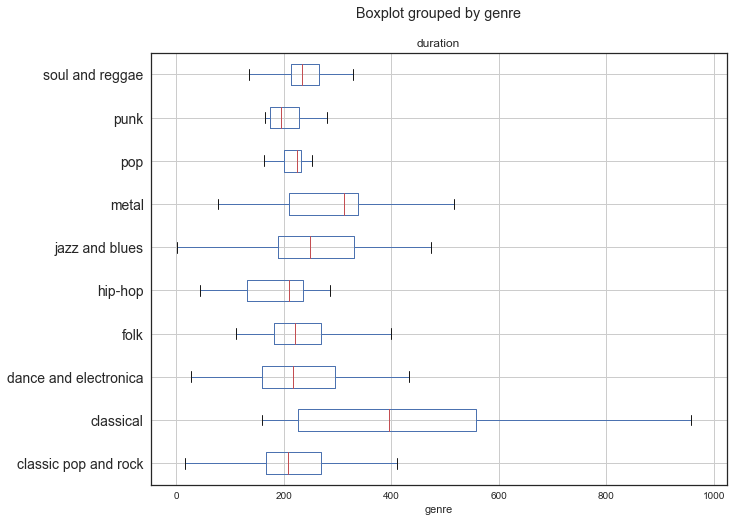

In [56]:
# 2nd plot revision - 只要指定 column 和 vert = False 就可以使之变成横的
# 如果加上 rot = 45，还可以让 label 的角度变成45度
songs.boxplot(by='genre', column='duration', vert=False, fontsize=14, figsize=(10,8))

### scatterplot: duration & loudness

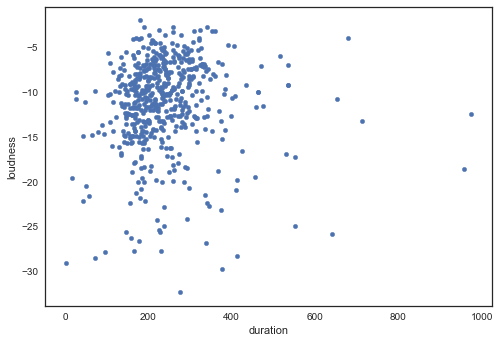

In [57]:
# 1st plot - pandas scatterplot - all songs
songs.plot(kind='scatter', x='duration', y='loudness')

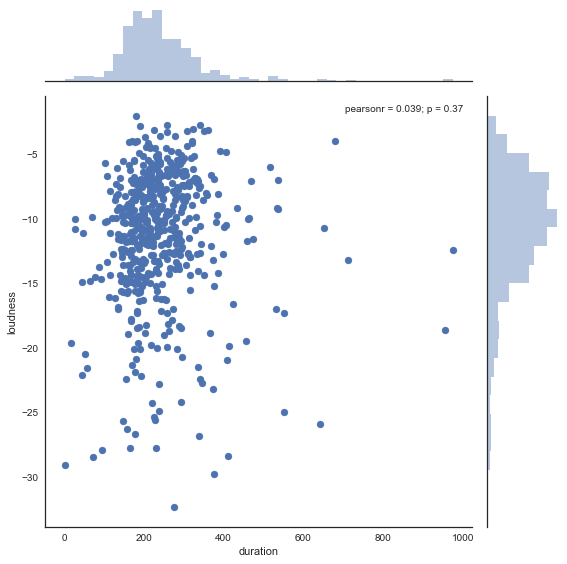

In [59]:
# 2nd plot - sns jointplot
# 这里的 size 是管用的
sns.jointplot(data=songs, x='duration', y='loudness', size=8)

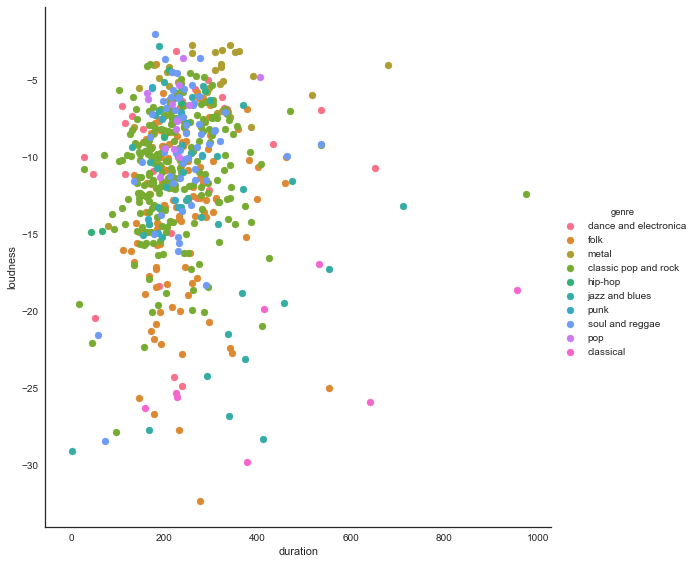

In [60]:
# 3rd plot - sns FacetGrid 
sns.FacetGrid(songs, hue='genre', size=8)\
   .map(plt.scatter, 'duration', 'loudness')\
   .add_legend()

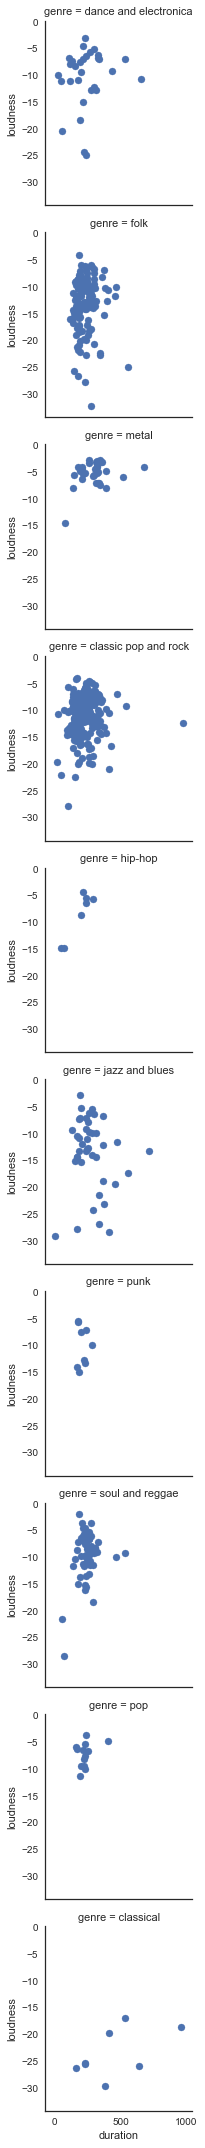

In [61]:
# 3rd plot revision， 上一个太乱了，我们试着把不同 genre 放到不同 row 中
sns.FacetGrid(songs, row='genre')\
   .map(plt.scatter, 'duration', 'loudness')

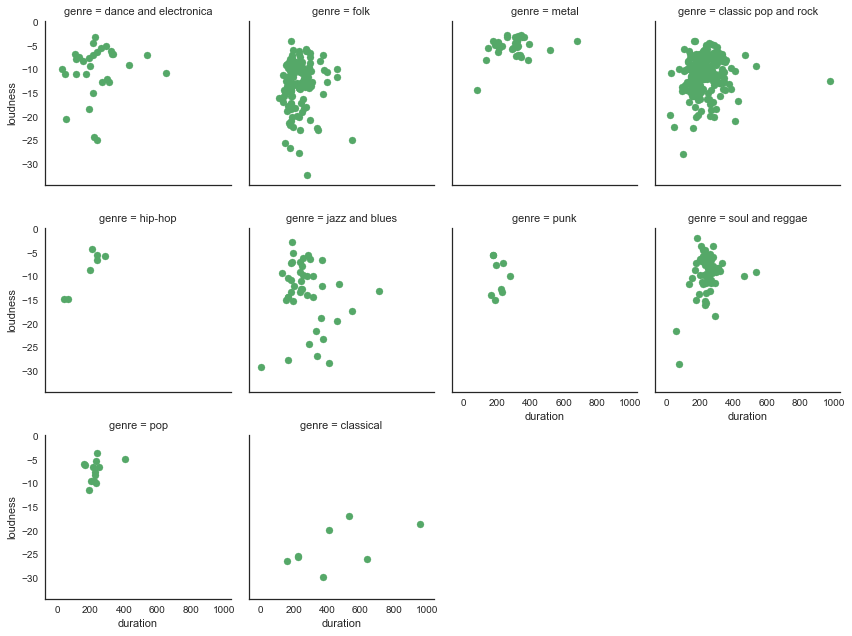

In [69]:
# 3rd plot revision's revision， 上一个每个 row 太多了，要加入新 col_wrap, 但是要删掉 row, 改用 col
# 颜色改成绿色：color='g'
sns.FacetGrid(songs, col='genre', col_wrap=4)\
   .map(plt.scatter, 'duration', 'loudness', color='g')

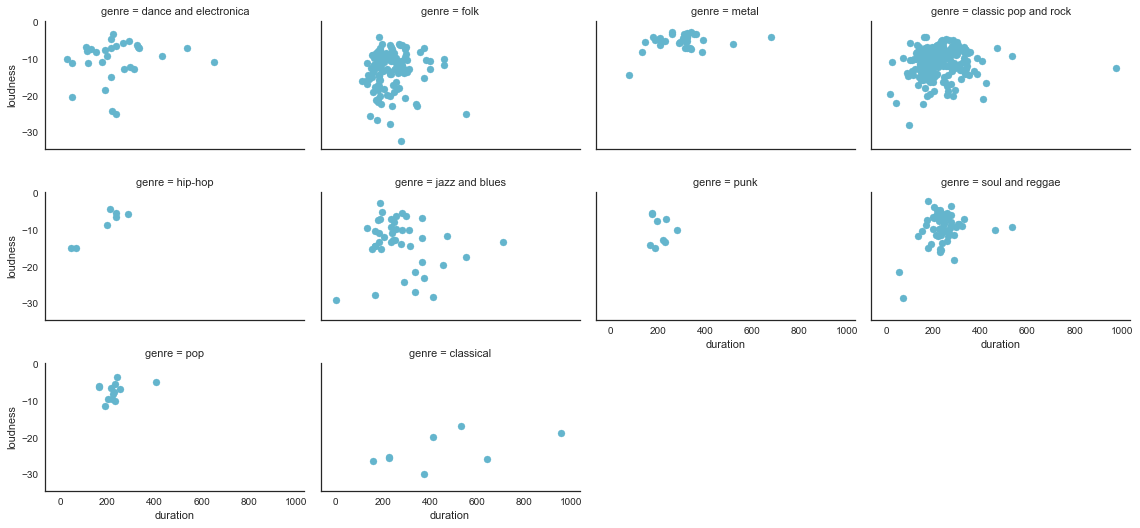

In [89]:
# 3rd plot revision's revision's revison， 给上一个变小点
# 颜色改成 cyan 蓝绿色
# 上图 size 大概是3，这个改成2.5
# aspect 是比例，deafult=1，增大会使图整体比例变小
sns.FacetGrid(songs, col='genre', col_wrap=4, size=2.5, aspect=1.6)\
   .map(plt.scatter, 'duration', 'loudness', color='c')

### kdeplot: duration & loudness

NameError: name 'duration' is not defined

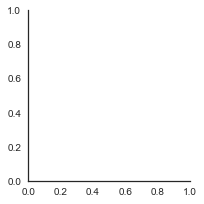

In [95]:
# 1st plot - FacetGrid - sns kdeplot - duration & loudness
# doesn't work
sns.FacetGrid(songs, hue='genre')\
   .map(sns.kdeplot, duration)

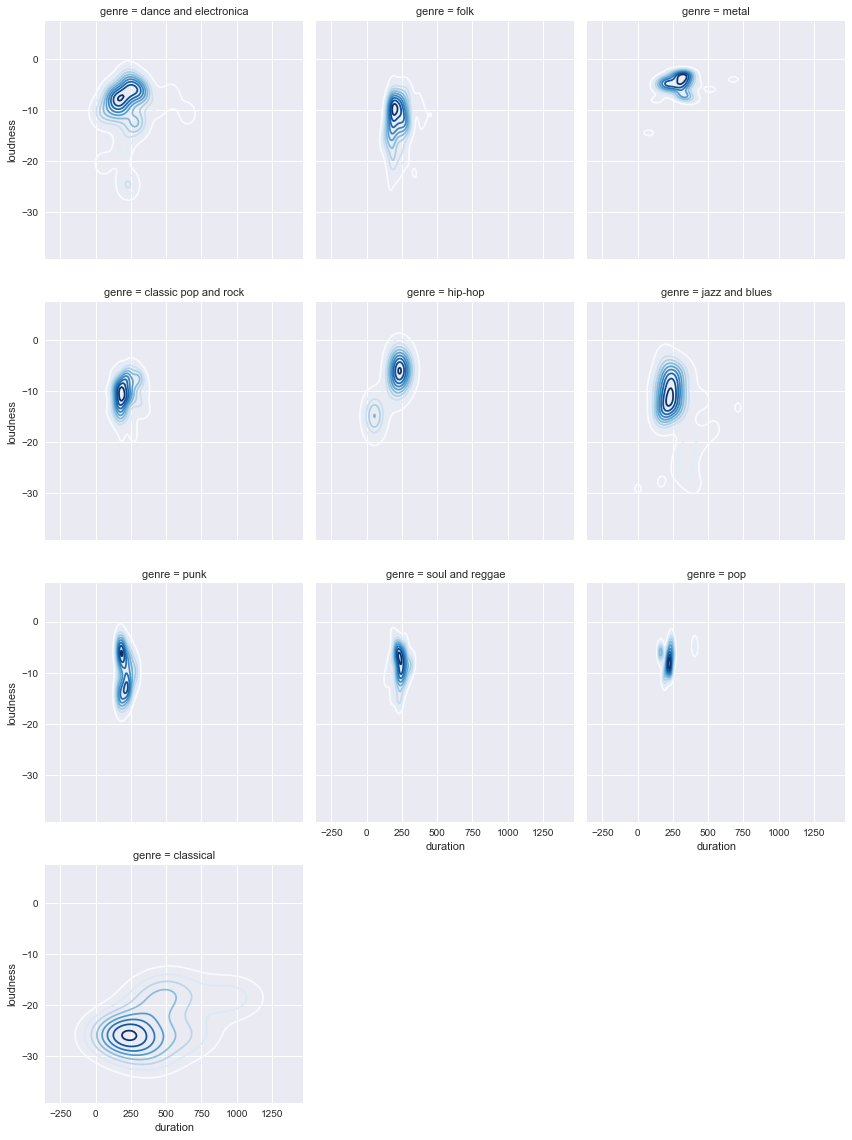

In [121]:
# 1st plot revision
# 只有俩变量才能使用，还搞不清楚为什么
# 如果想要加入蓝色grid，需要加第一行
# cmap 改变颜色，配合'darkgrid'
# 如果有'darkgrid'，就不加 shade=True
with sns.axes_style('darkgrid'):
    sns.FacetGrid(songs, col="genre", col_wrap=3, size=4, aspect=1)\
    .map(sns.kdeplot, "duration", "loudness", cmap='Blues')

### histogram: duration

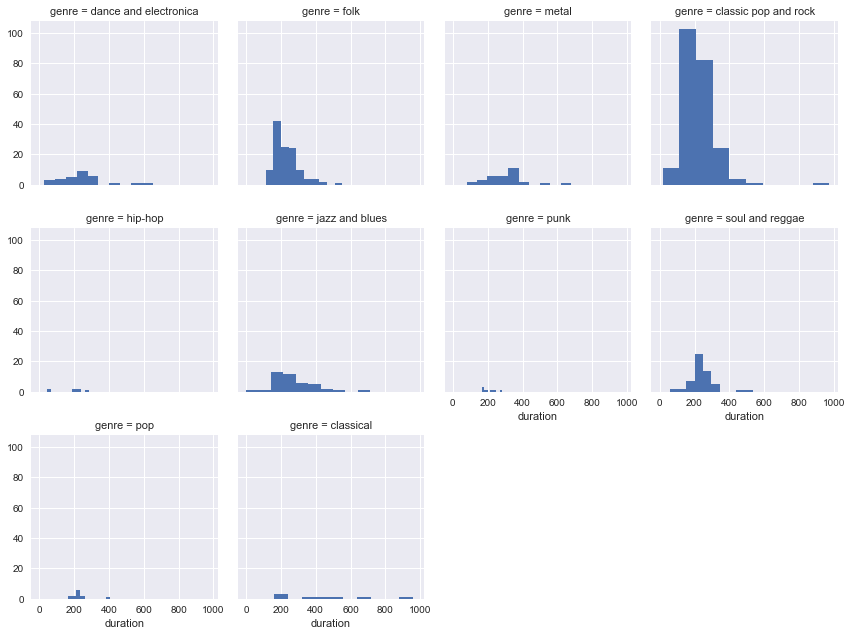

In [123]:
# 1st plot - FacetGrid - plt.hist
sns.FacetGrid(songs, col='genre', col_wrap=4, size=3)\
   .map(plt.hist, 'duration')

TypeError: slice indices must be integers or None or have an __index__ method

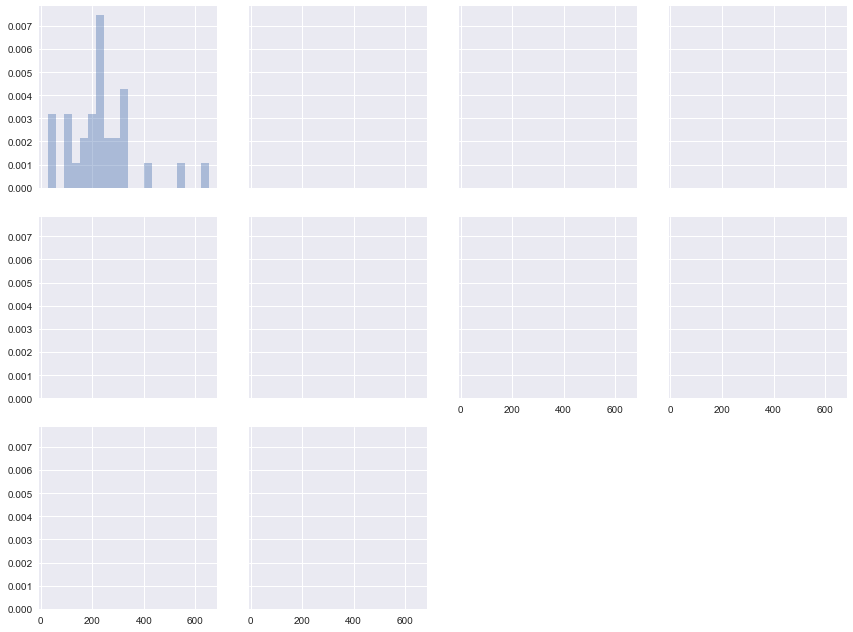

In [126]:
# 2nd plot - FacetGrid - sns distplot
sns.FacetGrid(songs, col='genre', col_wrap=4, size=3)\
   .map(sns.distplot, 'duration', bins=20)

TypeError: slice indices must be integers or None or have an __index__ method

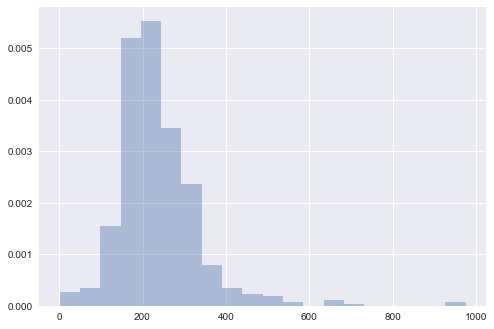

In [127]:
# 2nd plot revision
# 能画出来，但还是搞不明白为什么会告错
sns.distplot(songs.duration, bins=20)

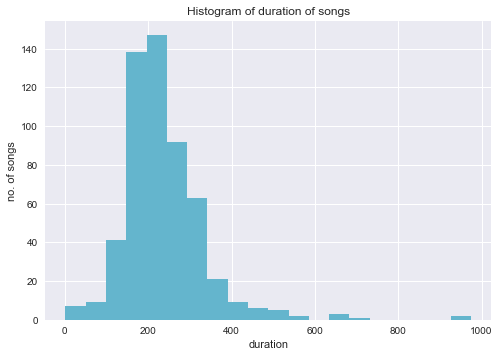

In [142]:
# 3rd plot - plt.hist
# works well
plt.hist(songs['duration'], bins=20, facecolor='c')
plt.xlabel('duration')
plt.ylabel('no. of songs')
plt.title('Histogram of duration of songs')

### pairplot

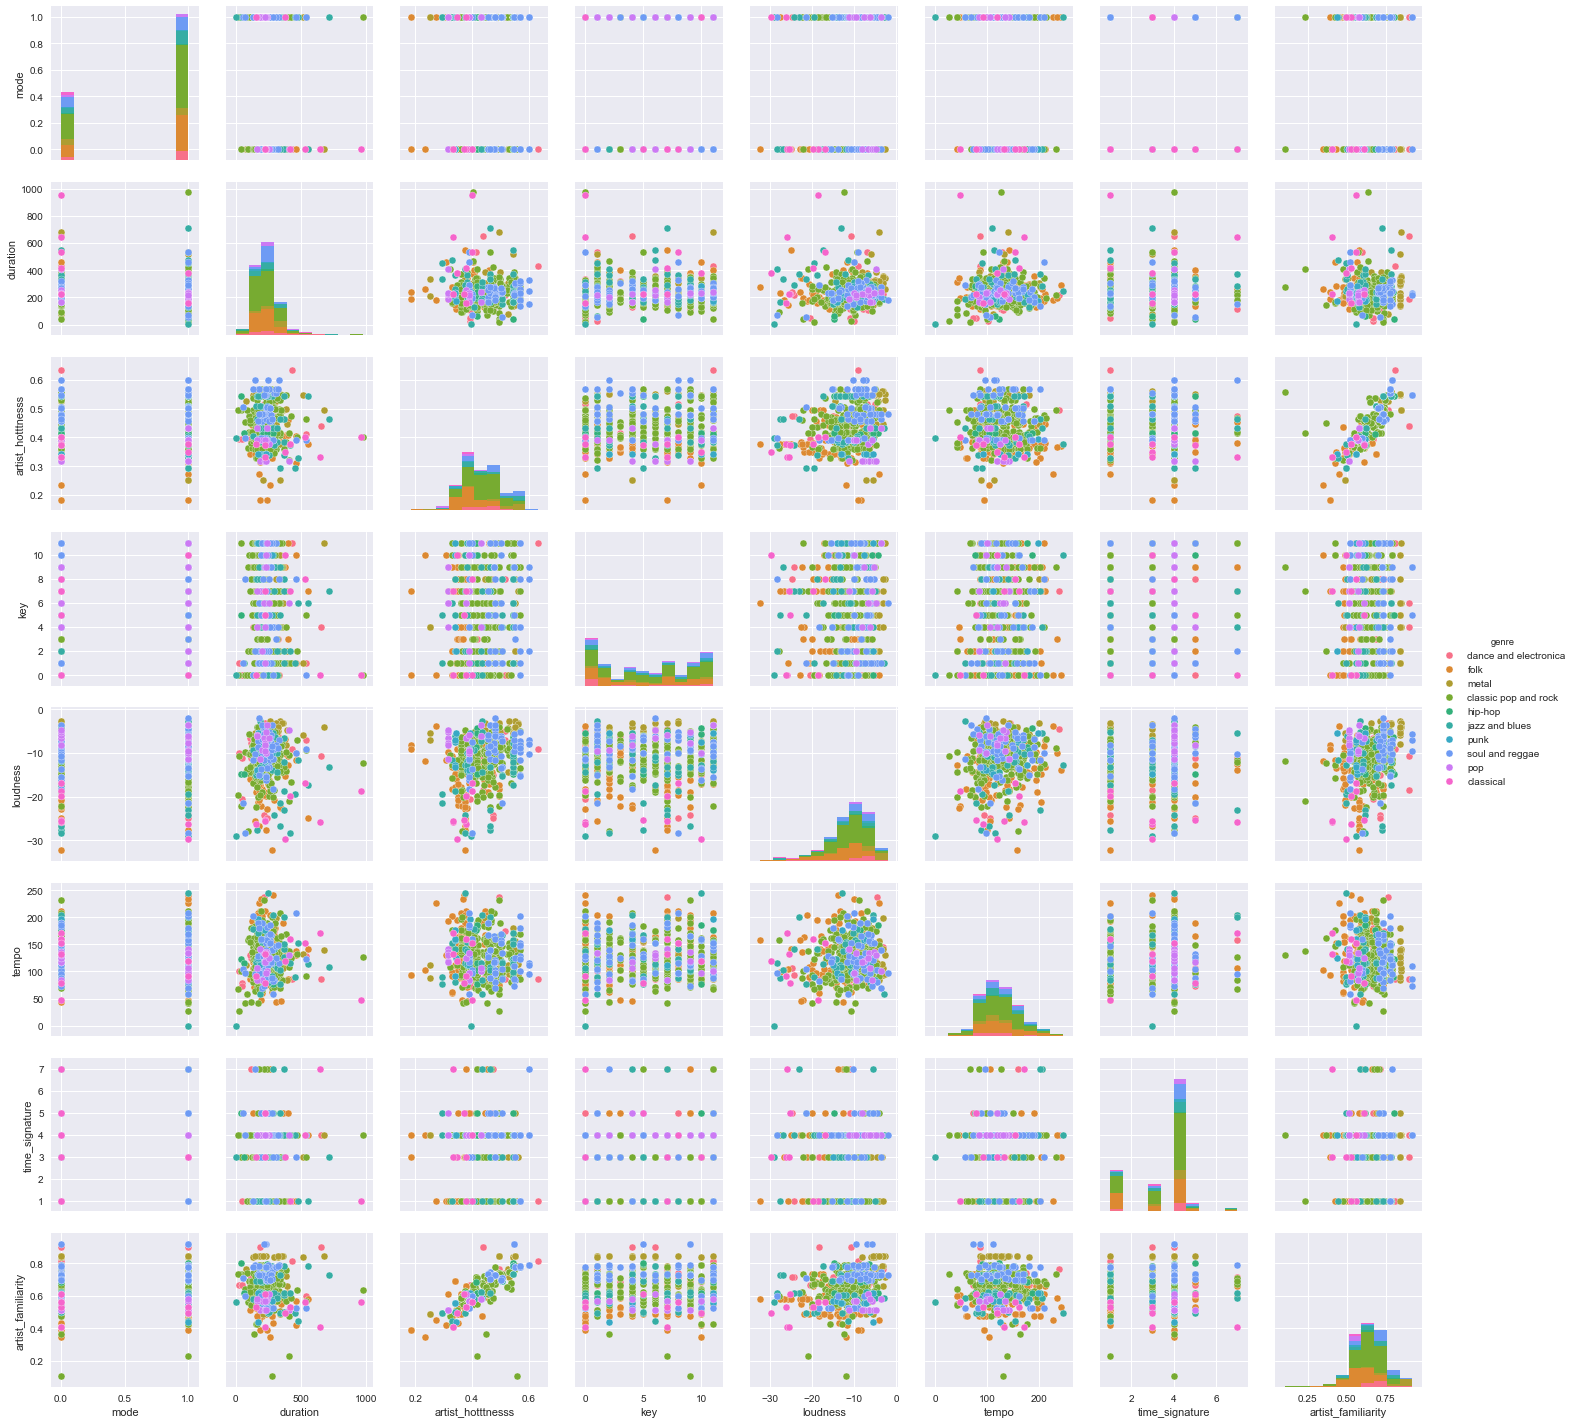

In [143]:
# 1st plot - sns pairplot - all cols
sns.pairplot(songs, hue='genre')

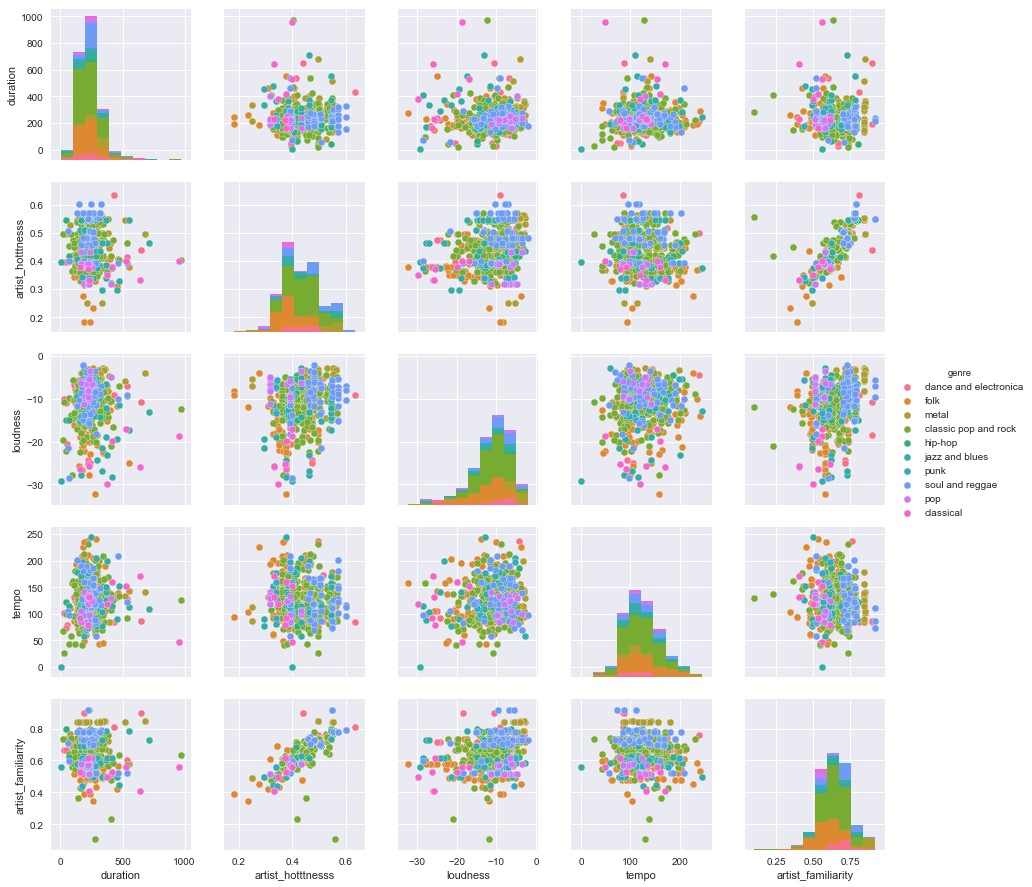

In [144]:
# 2nd plot - drop several cols
sns.pairplot(songs.drop(['mode', 'key', 'time_signature'], axis=1), hue='genre')

TypeError: slice indices must be integers or None or have an __index__ method

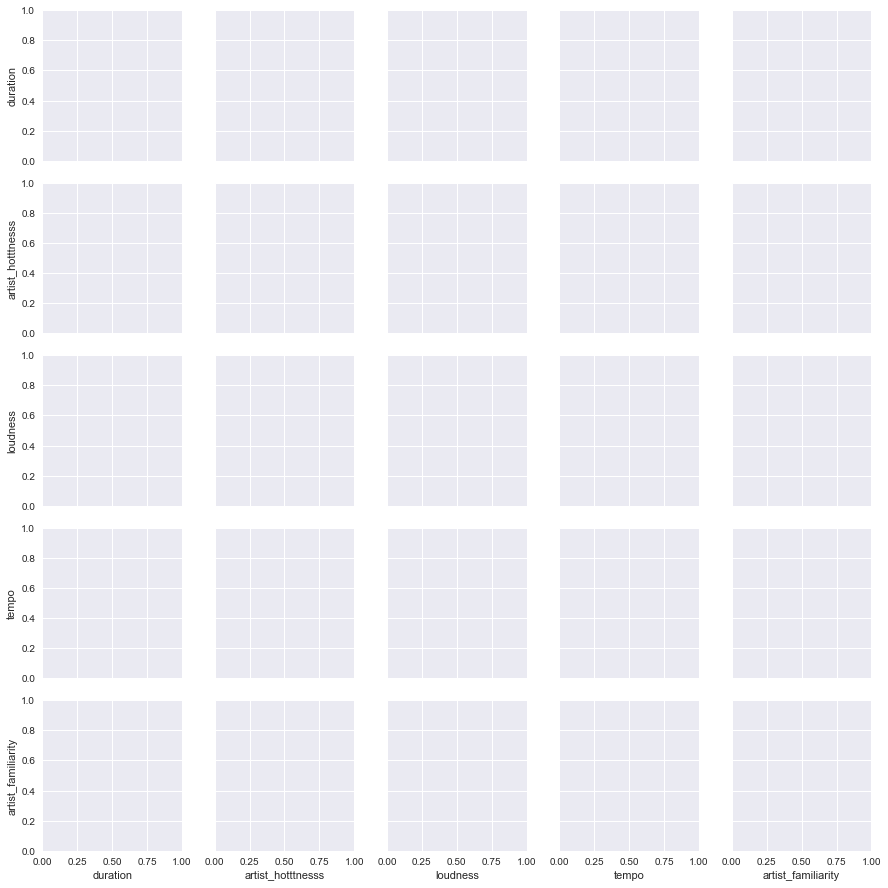

In [146]:
# 2nd plot revision - diag_kind=kde
# 果然不行
sns.pairplot(songs.drop(['mode', 'key', 'time_signature'], axis=1), hue='genre', diag_kind="kde")

### heatmap

In [148]:
# 1st plot - sns heatmap
# pairplot 不大明显
sns.heatmap(songs.drop(['mode', 'key', 'time_signature'], axis=1))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [153]:
# 1st plot revision
# 参考 http://walkerke.github.io/geog30323/slides/data-visualization/#/heat-maps-in-seaborn
# 需要 x 为 index，y 为 cols
# doesn't work
heat = songs.pivot(index='genre', columns='mode', values='duration')
sns.heatmap(heat)

ValueError: Index contains duplicate entries, cannot reshape

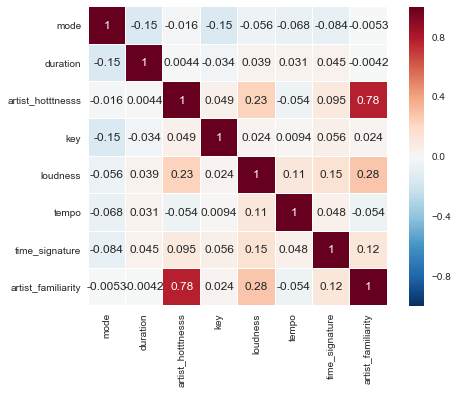

In [163]:
# 2nd plot - correlation 
# drop 掉所有 objective 的 cols
# vmax=1 表示为右边那条的最大值，如果 vim 不是0的话即为 -vmax
sns.heatmap(songs.drop(['track_id', 'artist_name', 'title', 'genre'], axis=1).corr(),linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)